In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.nn import functional as F
from utils import (
    generate_class_vectors,
    generate_class_vectors_hemispheres,
    SigLIPLoss,
    SigLIPExperiment,
)
from utils.siglip_experiment import *
%load_ext autoreload
%autoreload 2

In [5]:
def xi_loss(U, V):
    with torch.no_grad():
        mean_of_norms = torch.mean(torch.norm(U - V, dim=1))
        norm_of_mean = torch.norm(torch.mean(U - V, dim=0))
    return mean_of_norms.item() - norm_of_mean.item()

In [44]:
torch.manual_seed(50)

n_classes = 100
dim = 100
n_epochs = int(1000)
device_str = 'cuda' if torch.cuda.is_available() else 'cpu'

rb = 0
bias_is_trainable = False
temperature_is_trainable = True

t = 10 
runs = 20 
xi_history = []
losses = []

# print(f"Using device: {device_str}")
for i in range(runs):
    print(f"Run {i:.0f}")
    experiment = SigLIPExperiment(
        n_classes=n_classes,
        dim=dim,
        n_epochs=n_epochs,
        device=device_str, 
        extra_stats = xi_loss)

    U_final, V_final, criterion_final, losses_history = experiment.train(
        relative_bias=rb,
        temperature=t,
        trainable_temp=temperature_is_trainable,
        trainable_bias=bias_is_trainable
    )

    final_loss = losses_history[-1]
    final_temp = criterion_final.get_temperature()

    losses.append(final_loss)

    xi_history.append(experiment.extra_stat_history)

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19


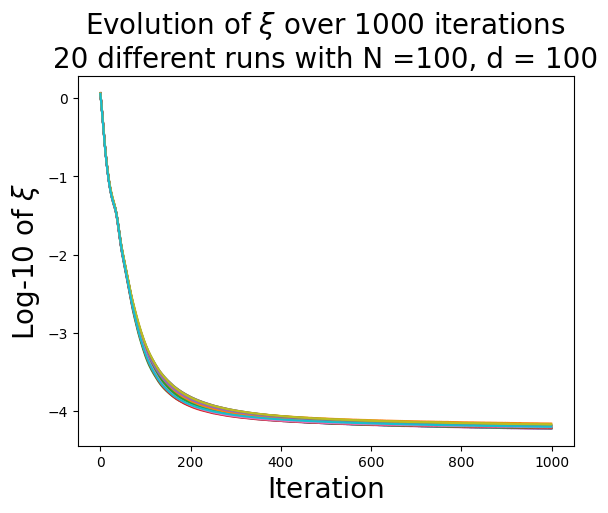

In [45]:
import matplotlib.pyplot as plt
for xi in xi_history:
    plt.plot(np.arange(len(xi)), np.log10(xi))
plt.title(r'Evolution of $\xi$ over 1000 iterations' + '\n' +
f'20 different runs with N ={n_classes:.0f}, d = {dim:.0f}', fontsize = 20)
plt.xlabel('Iteration', fontsize = 20)
plt.ylabel(r'Log-10 of $\xi$', fontsize = 20)
plt.savefig('logs/evolution_of_xi_high_dimension.png', dpi = 300, bbox_inches='tight')